<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/01%20howto.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [2]:
import okama as ok

## Информация об одной ценной бумаге

Самая простая операция - получение базовой информации и исторических данных по отдельно взятой ценной бумаге, валюте или индексе.

In [3]:
one_asset = ok.Asset('VOO.US')
one_asset

symbol                         VOO.US
name             Vanguard S&P 500 ETF
country                           USA
exchange                    NYSE ARCA
currency                          USD
type                              ETF
first date                    2010-10
last date                     2021-06
period length                    10.7
dtype: object

Текущая цена (передается с задержкой 20 минут). Текущая цена не доступна для внебиржевых видов ценных бумаг.

In [4]:
one_asset.price

389.41

История дивидендных выплат

In [5]:
one_asset.dividends.tail(10)  # последние 10 значений

Date
2018-12-17    1.2890
2019-03-21    1.4551
2019-06-27    1.3859
2019-09-26    1.3014
2019-12-23    1.4285
2020-03-10    1.1780
2020-06-29    1.4333
2020-09-29    1.3085
2020-12-22    1.3829
2021-03-26    1.2625
Freq: D, Name: VOO.US, dtype: float64

Поиск по ценным бумагам доступен через команду `search`:

In [9]:
ok.search('aeroflot')

[['AETG.XFRA',
  'AETG',
  'Public Joint Stock Company Aeroflot - Russian Airlines',
  'Germany',
  'XFRA',
  'EUR',
  'Common Stock'],
 ['AFLT.MOEX',
  'AFLT',
  'Public Joint Stock Company Aeroflot - Russian Airlines',
  'Russia',
  'MOEX',
  'RUB',
  'Common Stock']]

## Namespace (Расширения)

**namespace** - типа ценной бумаги. Указывается после тикера через точуку.   
Например, все американские ценные бумаги доступны через **.US** (MSFT.US)  
Ценные бумаги Московсой биржи - через **.MOEX**, российские ПИФы - через **.PIF**

Список всех доступных расширений можно получить через команду `namespace`

In [6]:
# Список всех доступных расширений
ok.namespaces

{'CBR': 'Central Banks official currency exchange rates',
 'CC': 'Cryptocurrency pairs with USD',
 'COMM': 'Commodities prices',
 'FX': 'FOREX currency market',
 'INDX': 'Indexes',
 'INFL': 'Inflation',
 'LSE': 'London Stock Exchange',
 'MOEX': 'Moscow Exchange',
 'PIF': 'Russian mutual funds',
 'RATE': 'Bank deposit rates',
 'RE': 'Real estate prices',
 'US': 'US Stock Exchanges and mutual funds',
 'XAMS': 'Euronext Amsterdam',
 'XETR': 'XETRA Exchange',
 'XFRA': 'Frankfurt Stock Exchange',
 'XSTU': 'Stuttgart Exchange'}

Можно выяснить, какие тикеры доступны в одном namespace через команду `symbols_in_namespace`

In [10]:
# все биржевые индексы (INDX), доступные через библиотеку okama
ok.symbols_in_namespace('INDX')

,symbol,ticker,name,country,exchange,currency,type
0,000906.INDX,000906,CHINA SECURITIES INDEX 800,Unknown,INDX,USD,INDEX
1,0O7N.INDX,0O7N,SCALE ALL SHARE GR EUR,Germany,INDX,EUR,INDEX
2,3LHE.INDX,3LHE,ESTX 50 CORPORATE BOND TR,Greece,INDX,EUR,INDEX
3,5SP2550.INDX,5SP2550,S&P 500 RETAILING INDEX,USA,INDX,USD,INDEX
4,990100.INDX,990100,MSCI International World Index Price,Unknown,INDX,USD,INDEX
...,...,...,...,...,...,...,...
662,XNG.INDX,XNG,ARCA Natural Gas,USA,INDX,USD,INDEX
663,XOI.INDX,XOI,ARCA Oil,USA,INDX,USD,INDEX
664,XU030.INDX,XU030,BIST 30,Turkey,INDX,TRY,INDEX
665,XU100.INDX,XU100,BIST 100,Turkey,INDX,TRY,INDEX


## Сравнение активов

Для сравнения различных активов между собой и сопоставления с инфляцией используется **AssetList** (список активов).  
У каждого списка активов есть **базовая валюта** (ccy), к которой приводятся все показатели списка: доходность, метрики риска.

Для примера создадим список активов из индексов **S&P500 TR** (полной доходности), **MCFTR** (Индекс Мосбиржи полной доходности) и **золота** (спотовые цены).   
Базовой валютой будет являться российский рубль.

In [4]:
al = ok.AssetList(['SP500TR.INDX', 'MCFTR.INDX', 'GC.COMM'], ccy='RUB')

Карткая информация по созданному списку активов:

In [18]:
al

symbols          [SP500TR.INDX, MCFTR.INDX, GC.COMM]
currency                                         RUB
first_date                                   2003-03
last_date                                    2021-04
period_length                     18 years, 2 months
inflation                                   RUB.INFL
dtype: object

**first_date** и **last_date** - временные границы доступных исторических данных. Как правило, последняя датя (last_date) обусловлена ограничениями по данным инфляции выбранной валюты.

Названия активов доступны черз `name`:

In [20]:
al.names

{'SP500TR.INDX': 'S&P 500 (TR)',
 'MCFTR.INDX': 'MOEX Total Return',
 'GC.COMM': 'Gold'}

Начнем с изучения графика накполенного дохода. На графике кроме активов отображается **накопленная инфляция**.

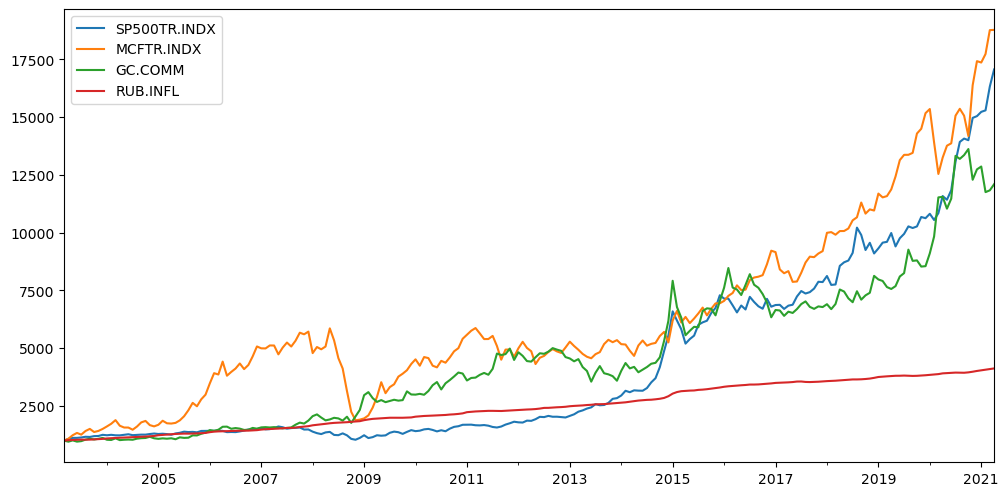

In [21]:
al.wealth_indexes.plot();

История просадок доступна через команду `drawdowns`:

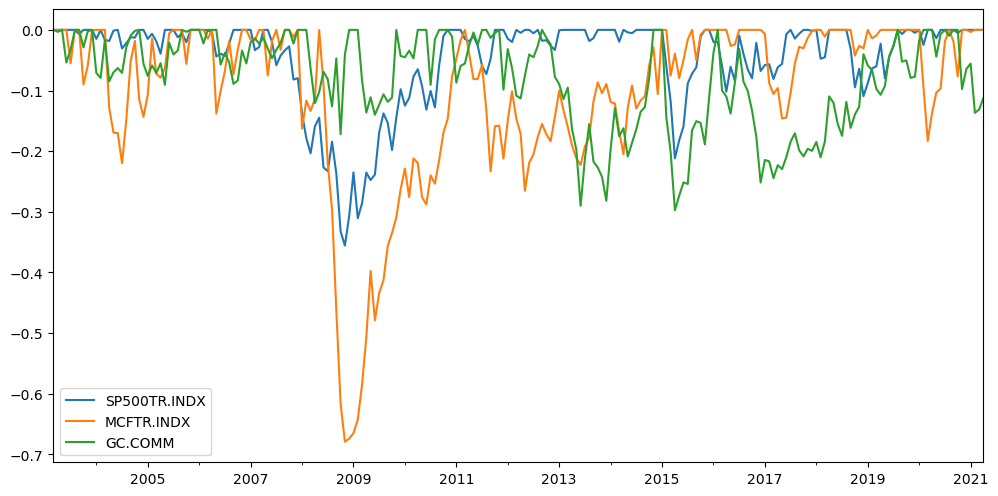

In [23]:
al.drawdowns.plot();

Сводные характеристики риск/доходности доступны через `describe`:

In [25]:
al.describe([5, 8, 12])  # указаны периоды расчета среднегодовой доходности (CAGR). По умолчанию - 1, 5 и 10 лет.

,property,period,GC.COMM,MCFTR.INDX,SP500TR.INDX,inflation
0,Compound return,YTD,-0.050527,0.077708,0.134249,0.027172
1,CAGR,5 years,0.099132,0.194533,0.211116,0.040485
2,CAGR,8 years,0.141894,0.187384,0.284050,0.063306
3,CAGR,12 years,0.133947,0.168742,0.244803,0.064179
4,CAGR,"18 years, 2 months",0.147084,0.175193,0.169018,0.081127
5,Dividend yield,LTM,0.000000,0.000000,0.000000,NaN
6,Risk,"18 years, 2 months",0.254050,0.295106,0.176431,NaN
7,CVAR,"18 years, 2 months",0.234150,0.644897,0.286361,NaN
8,Max drawdowns,"18 years, 2 months",-0.297470,-0.679146,-0.355660,NaN
9,Max drawdowns dates,"18 years, 2 months",2015-04,2008-11,2008-11,NaN


#### Корреляция активов

Месячные данные доходности выбранных активов доступны через `ror`:

In [5]:
al.ror

,SP500TR.INDX,MCFTR.INDX,GC.COMM
2003-03,0.003339,-0.0467,-0.042371
2003-04,0.072767,0.1358,-0.003251
2003-05,0.039436,0.1388,0.059480
2003-06,0.000950,0.0816,-0.053802
2003-07,0.014547,-0.0552,0.022324
...,...,...,...
2020-12,0.005067,0.0636,0.036524
2021-01,0.012272,-0.0034,0.009715
2021-02,0.004273,0.0212,-0.086127
2021-03,0.067390,0.0583,0.006545


Корреляционная матрица может быть получена через `ror.corr()` , а ror.corr() - ковариационная.

In [6]:
al.ror.corr()

,SP500TR.INDX,MCFTR.INDX,GC.COMM
SP500TR.INDX,1.000000,0.253293,0.317909
MCFTR.INDX,0.253293,1.000000,0.027856
GC.COMM,0.317909,0.027856,1.000000


История скользящей корреляции активов с бенчмарком.  
Бенчмарк должен стоять на первом месте в AssetList (в данном случае S&P 500 - это бенчмарк).

<AxesSubplot:>

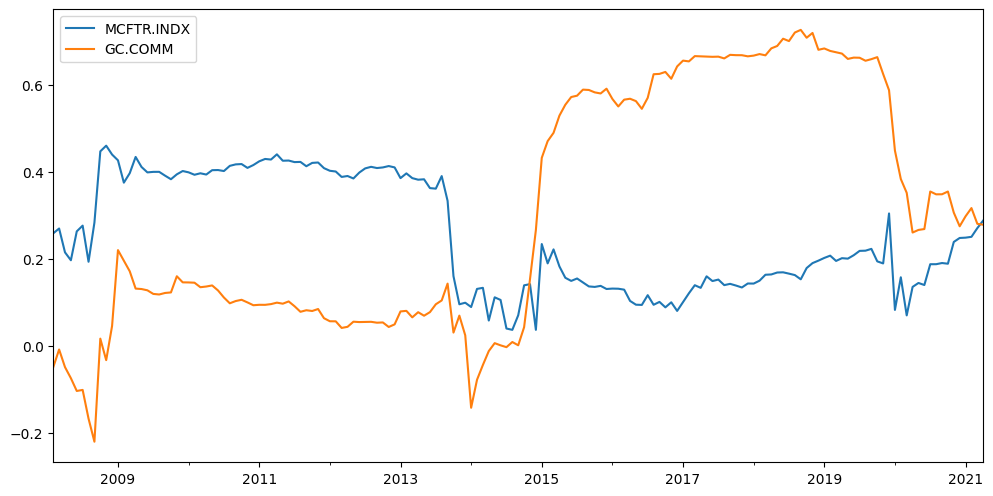

In [11]:
al.index_rolling_corr(window=12*5).plot()  # размер окна скользящей корреляции указывается с помощью параметра window

## Портфель

Инвестиционный портфель создается при помощи характеристик аналогичных "списку активов" (ценные бумаги, базовая валюта), но добавляются веса активов.

Создадим косервативный портфель, состоящий из ETF. Базовая валюта портфеля - доллар США.

переменные с характеристиками портфеля:

In [15]:
tickers = ['SPY.US', 'AGG.US', 'GLD.US', 'VNQ.US']  # акции США, облигации, золото и недвижимость
weights = [0.30,      0.50,     0.10,    0.10]  # веса ценных бумаг
currency = 'USD'  # валюта

Создаем портфель с этими характеристиками

In [18]:
y = ok.Portfolio(tickers, ccy=currency, weights=weights)
y

symbols          [SPY.US, AGG.US, GLD.US, VNQ.US]
weights                      [0.3, 0.5, 0.1, 0.1]
currency                                      USD
first date                                2004-12
last_date                                 2021-04
period length                  16 years, 5 months
dtype: object

Таблица с названиями ценных бумаг, тикерами и весами:

In [19]:
y.table

,asset name,ticker,weights
0,SPDR S&P 500 ETF Trust,SPY.US,0.3
1,iShares Core U.S. Aggregate Bond ETF,AGG.US,0.5
2,SPDR Gold Shares,GLD.US,0.1
3,Vanguard Real Estate Index Fund ETF Shares,VNQ.US,0.1


График накопленного дохода портфеля и инфляции:

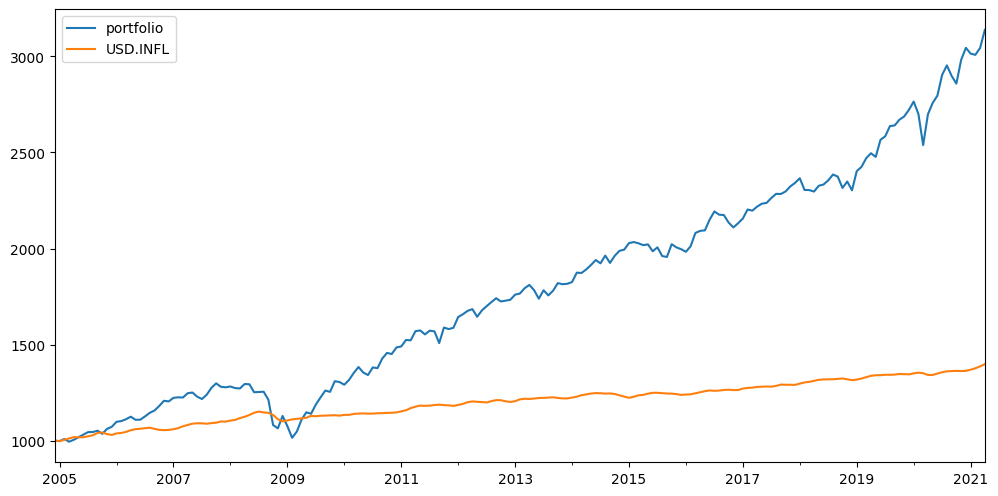

In [20]:
y.wealth_index.plot();

Сводная таблица с харктеристиками портфеля:

In [21]:
y.describe()

,property,rebalancing,period,portfolio,inflation
0,compound return,1 year,YTD,0.0328231,0.025333
1,CAGR,1 year,1 years,0.168289,0.041730
2,CAGR,1 year,5 years,0.083624,0.022238
3,CAGR,1 year,10 years,0.0714951,0.017352
4,CAGR,1 year,16.3 years,0.0723305,0.020634
5,CAGR,1 month,16.3 years,0.0721474,0.020634
6,CAGR,Not rebalanced,16.3 years,0.0727373,0.020634
7,Dividend yield (USD),1 month,LTM,0.0175248,NaN
8,Risk,1 month,16.3 years,0.076987,NaN
9,CVAR,1 month,16.3 years,0.138964,NaN


### Прогноз дохода

Применение **метода Монте Карло** для прогнозирования дохода. 
Могут использоваться нормальное распределение, логнормальное и характеристики исторического распределения данных:

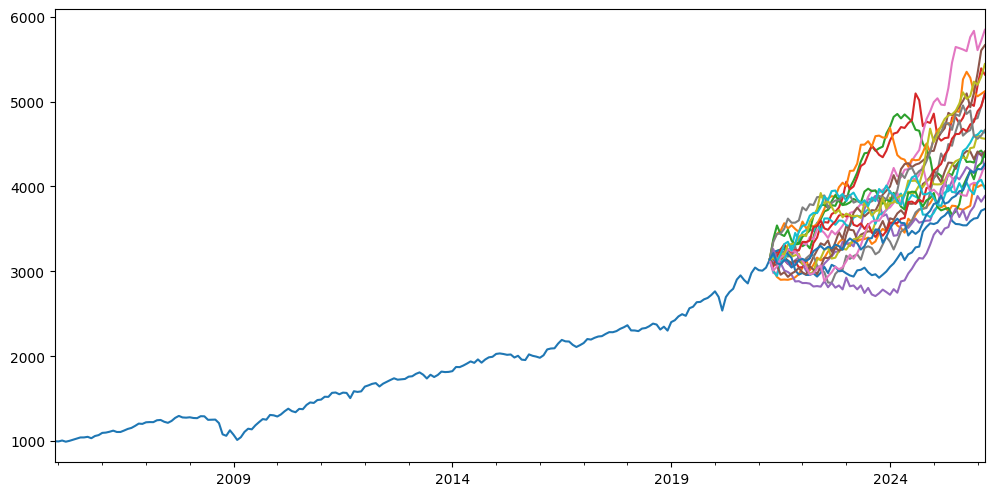

In [23]:
y.plot_forecast_monte_carlo(distr='norm', years=5, n=20)  # параметр dist указывает на тип распределения

Значения прогнозируемого дохода для списка перцентилей.  
По умолчанию берутся 10, 50 (медиана) и 90:

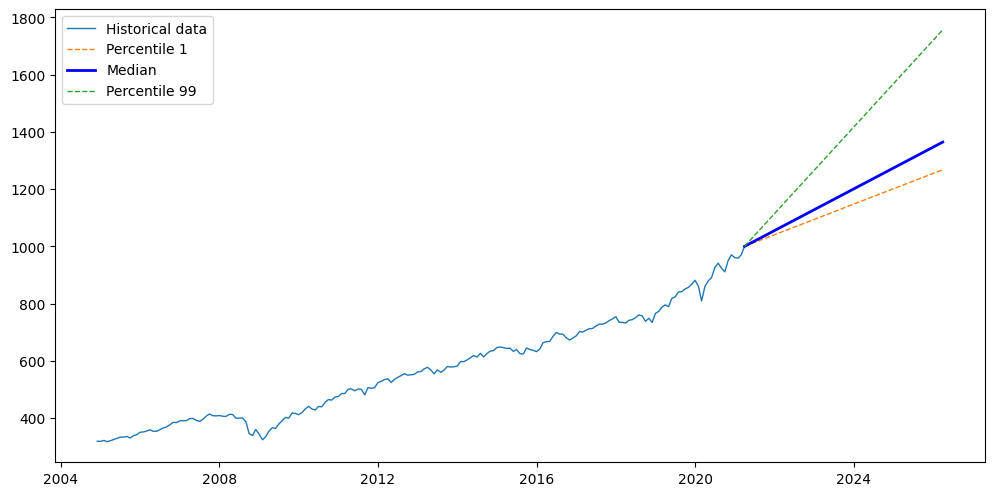

In [27]:
y.plot_forecast(distr='hist', years=5, today_value=1000, percentiles=[1,50,99]);  # в данном случае берется статистика исторического распределения данных

### Справка по доступных командам

для любого метода доступна документация через `.?`:

In [29]:
y.dividend_yield?

Type:        property
String form: <property object at 0x0000020CED51D180>
Docstring:  
Calculates dividend yield time series in all base currencies of portfolio assets.
For every currency dividend yield is a weighted sum of the assets dividend yields.
Portfolio asset allocation (weights) is a constant (monthly rebalanced portfolios).
TODO: calculate for not rebalance portfolios (and arbitrary reb period).


C:\Users\Sergey\Anaconda3\envs\tax\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

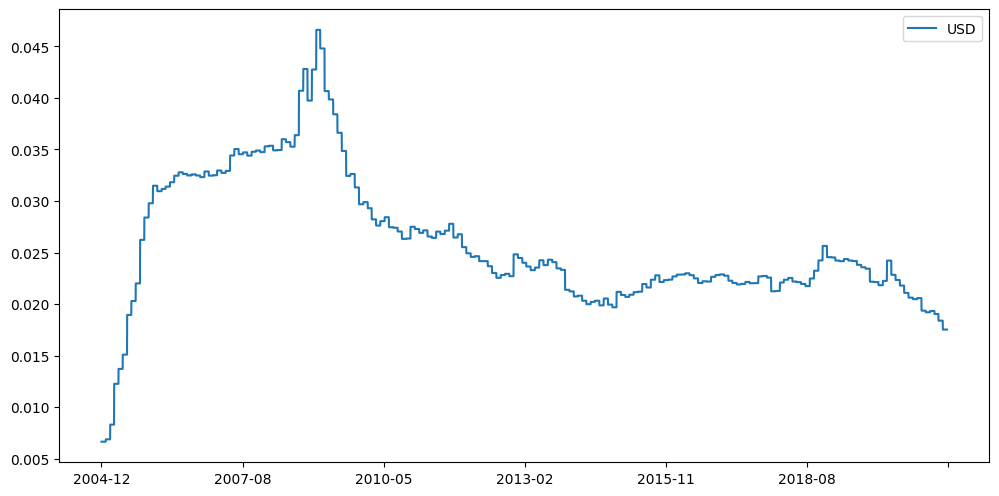

In [31]:
y.dividend_yield.plot()  # дивидендная доходность портфеля